In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words = 500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state = 42)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen = 100)
val_seq = pad_sequences(val_input, maxlen = 100)

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Embedding(500, 16, input_length = 100))
model.add(layers.LSTM(8))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [4]:
model.summary()
# LSTM 은 작은 셀이 4개가 존재하므로 파라미터 개수가 SimpleRNN에 비해 4배로 증가했음

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [5]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['acc'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 17s 16ms/step - loss: 0.6923 - acc: 0.5435 - val_loss: 0.6913 - val_acc: 0.5790
Epoch 2/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6891 - acc: 0.6100 - val_loss: 0.6863 - val_acc: 0.6428
Epoch 3/100
313/313 [==============================] - 4s 11ms/step - loss: 0.6795 - acc: 0.6643 - val_loss: 0.6699 - val_acc: 0.6882
Epoch 4/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6316 - acc: 0.7142 - val_loss: 0.5872 - val_acc: 0.7188
Epoch 5/100
313/313 [==============================] - 3s 11ms/step - loss: 0.5661 - acc: 0.7283 - val_loss: 0.5537 - val_acc: 0.7374
Epoch 6/100
313/313 [==============================] - 4s 14ms/step - loss: 0.5353 - acc: 0.7528 - val_loss: 0.5279 - val_acc: 0.7504
Epoch 7/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5100 - acc: 0.7691 - val_loss: 0.5056 - val_acc: 0.7640
Epoch 8/100
313/313 [==============================] - 3s 11ms

In [6]:
import matplotlib.pyplot as plt
def plot_model(history):
  plt.plot(history['loss'])
  plt.plot(history['val_loss']) 
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['train', 'val']) 
  plt.show() 

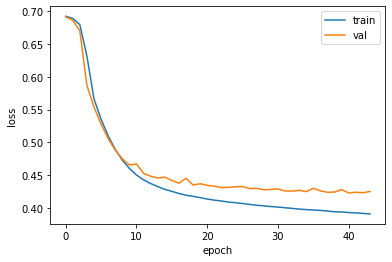

In [7]:
plot_model(history.history)

In [8]:
model2 = keras.Sequential()
model2.add(layers.Embedding(500, 16, input_length = 100))
model2.add(layers.LSTM(8, dropout = 0.3))
model2.add(layers.Dense(1, activation = 'sigmoid'))


In [9]:
model2.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['acc'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
history = model2.fit(train_seq, train_target, epochs = 100, batch_size= 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 10ms/step - loss: 0.6925 - acc: 0.5247 - val_loss: 0.6919 - val_acc: 0.5398
Epoch 2/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6901 - acc: 0.5894 - val_loss: 0.6889 - val_acc: 0.5892
Epoch 3/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6845 - acc: 0.6252 - val_loss: 0.6799 - val_acc: 0.6604
Epoch 4/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6612 - acc: 0.6730 - val_loss: 0.6278 - val_acc: 0.6910
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5919 - acc: 0.7190 - val_loss: 0.5756 - val_acc: 0.7386
Epoch 6/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5638 - acc: 0.7389 - val_loss: 0.5505 - val_acc: 0.7538
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5399 - acc: 0.7506 - val_loss: 0.5283 - val_acc: 0.7664
Epoch 8/100
313/313 [==============================] - 3s 9ms/step 

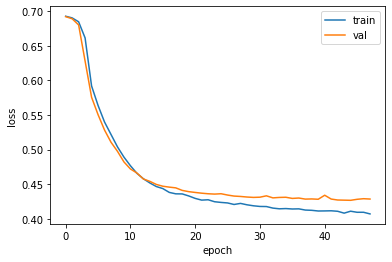

In [10]:
plot_model(history.history)

In [11]:
# 두개의 순환층을 연결할 떈, 앞의 순환층에선 은닉상태도 출력 해 줘야 한다.
model3 = keras.Sequential()
model3.add(layers.Embedding(500, 16, input_length = 100))
model3.add(layers.LSTM(8, dropout = 0.3, return_sequences = True))
model3.add(layers.LSTM(8, dropout = 0.3))
model3.add(layers.Dense(1, activation = 'sigmoid'))

In [12]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [13]:
model3.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['acc'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
history = model3.fit(train_seq, train_target, epochs = 100, batch_size= 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 18ms/step - loss: 0.6927 - acc: 0.5299 - val_loss: 0.6921 - val_acc: 0.5756
Epoch 2/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6902 - acc: 0.5972 - val_loss: 0.6872 - val_acc: 0.6512
Epoch 3/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6744 - acc: 0.6557 - val_loss: 0.6492 - val_acc: 0.6740
Epoch 4/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6020 - acc: 0.7088 - val_loss: 0.5675 - val_acc: 0.7240
Epoch 5/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5538 - acc: 0.7298 - val_loss: 0.5356 - val_acc: 0.7420
Epoch 6/100
 46/313 [===>..........................] - ETA: 2s - loss: 0.5366 - acc: 0.7459

KeyboardInterrupt: ignored

In [ ]:
plot_model(history.history)

#GRU

In [14]:
model4 = keras.Sequential()
model4.add(layers.Embedding(500, 16, input_length = 100))
model4.add(layers.GRU(8))
model4.add(layers.Dense(1, activation = 'sigmoid'))

In [15]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [17]:
model4.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['acc'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
history = model4.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 9ms/step - loss: 0.6922 - acc: 0.5322 - val_loss: 0.6914 - val_acc: 0.5544
Epoch 2/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6903 - acc: 0.5636 - val_loss: 0.6893 - val_acc: 0.5738
Epoch 3/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6874 - acc: 0.5878 - val_loss: 0.6860 - val_acc: 0.5876
Epoch 4/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6829 - acc: 0.6013 - val_loss: 0.6810 - val_acc: 0.5942
Epoch 5/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6764 - acc: 0.6119 - val_loss: 0.6740 - val_acc: 0.6068
Epoch 6/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6669 - acc: 0.6248 - val_loss: 0.6631 - val_acc: 0.6144
Epoch 7/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6528 - acc: 0.6399 - val_loss: 0.6474 - val_acc: 0.6344
Epoch 8/100
313/313 [==============================] - 3s 8ms/step 

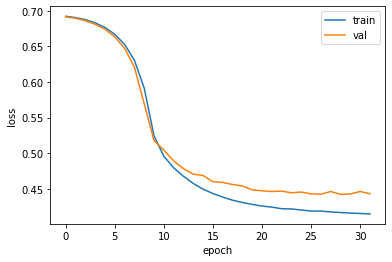

In [19]:
plot_model(history.history)